# CC 3230( AI  and Machine Learning Lab.)
Name: Pranav Soni  
Registration No.: 199303040

Date:- 01.02.2022(10:30 AM - 12 Noon)

Week-2

Technique: Hill Climbing 
Problem: TSP



### Technique Used: 
Hill Climbing Heuristic search.
Hill Climbing is a heuristic search used for mathematical optimization problems in the field of Artificial Intelligence. Given a large set of inputs and a good heuristic function, it tries to find a sufficiently good solution to the problem. This solution may not be the global optimal maximum. 

###   The Problem: 
Travelling Salesperson problem (TSP)

###   Proceedure:-

             1.   Import Libraries.
             2.   Create a Matrix Generating Function.
             3.   Find a random solution.
             4.   Find path lenght based on random solution.
             5.   Create a Function to get neighbours.
             6.   Create a function to get the best neighbours.
             7.   Apply Hill Climbing.
             8.   Plot the path and get the path length.

In [19]:
##Import Libraries
import random
import numpy as np
import networkx as nx

In [20]:
#coordinate of the points/cities
coordinate = np.array([ [15,20], [10,9], [60,55], [100,80], [16,13]])

## Matrix Generating Fucntion

In [21]:
#adjacency matrix for a weighted graph based on the given coordinates
def generate_matrix(coordinate):
    matrix = []
    for i in range(len(coordinate)):
        for j in range(len(coordinate)) :       
            p = np.linalg.norm(coordinate[i] - coordinate[j])
            matrix.append(p)
    matrix = np.reshape(matrix, (len(coordinate),len(coordinate)))
    #print(matrix)
    return matrix

## Finding a random solution

In [22]:
#finds a random solution    
def solution(matrix):
    points = list(range(0, len(matrix)))
    solution = []
    for i in range(0, len(matrix)):
        random_point = points[random.randint(0, len(points) - 1)]
        solution.append(random_point)
        points.remove(random_point)

    return solution

## Finding path length based on random solution

In [23]:
#computes the path based on the random solution
def path_length(matrix, solution):
    cycle_length = 0
    for i in range(0, len(solution)):
        cycle_length += matrix[solution[i]][solution[i - 1]]
    return cycle_length

## A fucntion to get neighbors

In [24]:
#generate neighbors of the random solution by swapping cities and returns the neighbor
def get_neighbors(solution):
    neighbors = []
    for i in range(len(solution)):
        for j in range(i + 1, len(solution)):
            neighbor = solution.copy()
            neighbor[i] = solution[j]
            neighbor[j] = solution[i]
            neighbors.append(neighbor)
    return neighbors

## To get the best Neighbor from the above neighbors

In [34]:
explored = 0
#returns the best neighbor
def get_best_neighbor(matrix, neighbors):
            
    #assume that the first neighbor in the list is the best neighbor      
    best_neighbor = neighbors[0]
    best_path = path_length(matrix, best_neighbor)
    
    #check if there is a better neighbor
    for neighbor in neighbors:
        global explored
        explored += 1
        current_path = path_length(matrix, neighbor)
        if current_path < best_path:
            best_path = current_path
            best_neighbor = neighbor
    return best_neighbor, best_path

## Applying Hill climbing

In [35]:
def hill_climbing(coordinate):
    matrix = generate_matrix(coordinate)
    current_solution = solution(matrix)
    current_path = path_length(matrix, current_solution)
    neighbors = get_neighbors(current_solution)
    best_neighbor, best_neighbor_path = get_best_neighbor(matrix, neighbors)

    while best_neighbor_path < current_path:
        current_solution = best_neighbor
        current_path = best_neighbor_path
        neighbor = get_neighbors(current_solution)
        best_neighbor, best_neighbor_path = get_best_neighbor(matrix, neighbor)

    return current_path, current_solution

## Plottting the graph

The solution is 
 [2, 0, 1, 4, 3] 
The path length is 
 230.92048711743695
Times explored :  30


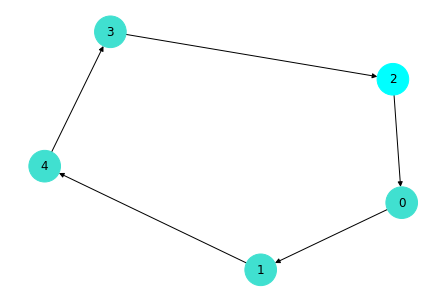

In [36]:
def graph(coordinate):
    final_solution = hill_climbing(coordinate)
    G = nx.DiGraph()
    temp = final_solution[1]
    G.add_nodes_from(final_solution[1])
    
    for i in range(1, len(final_solution[1])):
        G.add_edge(temp[i - 1], temp[i])
    G.add_edge(temp[len(temp) - 1], temp[0])
    color_map = []
    for node in G:
        if node == final_solution[1][0]:
            color_map.append('cyan')
        else: 
            color_map.append('turquoise')
    nx.draw(G, with_labels = True, node_color = color_map, node_size = 1000)
    print("The solution is \n", final_solution[1], "\nThe path length is \n", final_solution[0])
    print("Times explored : ", explored)
    return

    
graph(coordinate)